# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Exploratory Data Analysis¶

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 24.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
222602,0.0024,0.0024,0.0049,0.0024,0.0024,0.0049,0.0049,0.0098,0.0024,0.0024,0,0,0,0
135089,0.8350,0.6177,0.5298,0.0073,0.0220,0.0732,0.8203,0.0415,1.5356,1.5430,10,10,4,4
106258,0.0317,0.0391,0.0024,0.0024,0.0024,0.0098,0.0659,0.0073,0.0024,0.0195,6,0,1,0
84310,0.1270,0.0024,0.0049,0.0024,0.0049,0.0024,0.0244,0.0049,0.0024,0.0024,10,0,10,0
358710,0.3394,0.0024,0.0024,0.0024,0.0024,0.0024,0.1611,0.0195,0.0024,0.1392,5,0,13,0


In [3]:
raw_data.shape

(469559, 14)

In [4]:
raw_data.columns

Index(['Emg1', 'Emg2', 'Emg3', 'Emg4', 'Emg5', 'Emg6', 'Emg7', 'Emg8', 'Emg9',
       'Emg10', 'repetition', 'rerepetition', 'stimulus', 'restimulus'],
      dtype='object')

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469559 entries, 0 to 469558
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          469559 non-null  float64
 1   Emg2          469559 non-null  float64
 2   Emg3          469559 non-null  float64
 3   Emg4          469559 non-null  float64
 4   Emg5          469559 non-null  float64
 5   Emg6          469559 non-null  float64
 6   Emg7          469559 non-null  float64
 7   Emg8          469559 non-null  float64
 8   Emg9          469559 non-null  float64
 9   Emg10         469559 non-null  float64
 10  repetition    469559 non-null  int64  
 11  rerepetition  469559 non-null  int64  
 12  stimulus      469559 non-null  int64  
 13  restimulus    469559 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 50.2 MB


In [6]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,469559.000000,469559.00000,469559.000000,469559.000000,469559.000000,469559.000000,469559.000000,469559.000000,469559.000000,469559.000000,469559.000000,469559.000000,469559.000000,469559.00000
mean,0.528189,0.22986,0.295996,0.132394,0.049513,0.066152,0.385475,0.108756,0.282975,0.370430,3.159586,2.163741,5.601266,3.92688
std,0.796084,0.48866,0.740545,0.380632,0.130924,0.183762,0.633912,0.261841,0.612855,0.643215,3.483458,3.229246,6.579024,6.19468
min,0.002400,0.00240,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.000000,0.000000,0.000000,0.00000
25%,0.017100,0.00240,0.004900,0.002400,0.004900,0.002400,0.029300,0.009800,0.002400,0.004900,0.000000,0.000000,0.000000,0.00000
50%,0.156300,0.00980,0.004900,0.004900,0.004900,0.004900,0.134300,0.024400,0.004900,0.075700,2.000000,0.000000,3.000000,0.00000
75%,0.747100,0.24410,0.210000,0.107400,0.031700,0.056200,0.454100,0.073200,0.268600,0.449200,6.000000,4.000000,10.000000,7.00000
max,4.646000,4.64360,4.641100,4.643600,4.638700,3.815900,4.641100,4.040500,4.638700,4.641100,10.000000,10.000000,23.000000,23.00000


In [7]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     199810
12     15607
7      15597
4      15593
8      15589
2      15587
11     15571
9      15568
5      15547
6      15540
3      15528
10     15521
1      15514
13     10400
17     10396
14     10388
15     10372
16     10326
21      5202
18      5199
19      5194
23      5174
20      5168
22      5168
Name: stimulus, dtype: int64


Text(0, 0.5, 'Frequency')

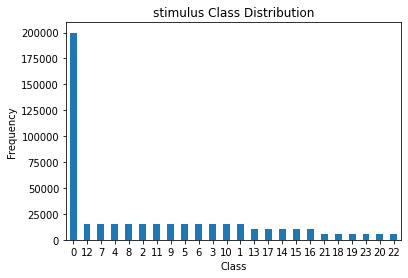

In [8]:
count_classes = pd.value_counts(raw_data['stimulus'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("stimulus Class Distribution")

plt.xlabel("Class")

plt.ylabel("Frequency")

# Data Cleaning and Exploratory Data Analysis with New Data

In [9]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [10]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [11]:
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
463141,1.2378,1.3184,1.1182,0.3735,0.1807,0.1733,1.0645,1.6528,0.8691,0.8301,3,3,23,23
394427,0.4419,0.0024,0.2295,0.0049,0.0024,0.0171,0.0708,0.0244,0.1538,0.0464,2,2,17,17
321060,1.4063,0.4639,3.7915,0.2490,0.1953,0.2173,1.2305,0.2002,0.2832,0.6934,3,3,9,9
73130,0.2808,0.0854,0.1904,0.0024,0.0024,0.0049,0.0293,0.0098,0.2368,0.2881,7,7,9,9
114881,1.9067,0.6616,0.8813,0.0562,0.0464,0.1465,0.9790,0.0342,2.1851,1.9946,6,6,2,2


In [12]:
raw_data.shape

(375686, 14)

In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375686 entries, 0 to 469558
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          375686 non-null  float64
 1   Emg2          375686 non-null  float64
 2   Emg3          375686 non-null  float64
 3   Emg4          375686 non-null  float64
 4   Emg5          375686 non-null  float64
 5   Emg6          375686 non-null  float64
 6   Emg7          375686 non-null  float64
 7   Emg8          375686 non-null  float64
 8   Emg9          375686 non-null  float64
 9   Emg10         375686 non-null  float64
 10  repetition    375686 non-null  int64  
 11  rerepetition  375686 non-null  int64  
 12  stimulus      375686 non-null  int64  
 13  restimulus    375686 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 43.0 MB


In [14]:
print(raw_data.isnull().any())

Emg1            False
Emg2            False
Emg3            False
Emg4            False
Emg5            False
Emg6            False
Emg7            False
Emg8            False
Emg9            False
Emg10           False
repetition      False
rerepetition    False
stimulus        False
restimulus      False
dtype: bool


In [15]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

In [16]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 39)

# Machine Learning Models

# Decision Tree

In [17]:
from sklearn import tree
tree = tree.DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
y_pred1 = tree.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred1)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred1)* 100}")

Accuracy is: 89.34360776171843


Classification report : 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96     38828
           1       0.89      0.88      0.88      2247
           2       0.81      0.81      0.81      1964
           3       0.84      0.83      0.84      2266
           4       0.80      0.82      0.81      1973
           5       0.82      0.82      0.82      1941
           6       0.84      0.84      0.84      2045
           7       0.85      0.84      0.84      2179
           8       0.80      0.83      0.81      2155
           9       0.78      0.79      0.78      1927
          10       0.76      0.75      0.75      1749
          11       0.81      0.80      0.80      2132
          12       0.75      0.73      0.74      1925
          13       0.77      0.79      0.78      1471
          14       0.81      0.80      0.80      1342
          15       0.77      0.79      0.78      1338
          16       0.84      0.85      0.85      1480
 

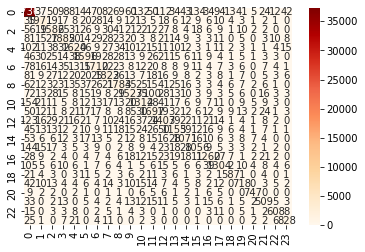

In [20]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred1))

cm = confusion_matrix(y_pred1, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Decision Tree

In [21]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

MAE: 0.7803375123106817
MSE: 8.863597646996194
RMSE: 2.977179478465515


In [22]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred1, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred1,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred1,average='weighted'))

Precision Score :  0.8936917640464905
Recall Score :  0.8934360776171844
f1_score :  0.8935306383950116


# KNeighborsClassifier

In [23]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier = KNeighborsClassifier()
KNeighborsClassifier.fit(X_train, y_train)

KNeighborsClassifier()

In [24]:
y_pred2 = KNeighborsClassifier.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred2)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred2)* 100}")

Accuracy is: 92.89973116132983


Classification report : 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     38828
           1       0.93      0.92      0.92      2247
           2       0.83      0.88      0.85      1964
           3       0.89      0.89      0.89      2266
           4       0.88      0.86      0.87      1973
           5       0.88      0.86      0.87      1941
           6       0.91      0.89      0.90      2045
           7       0.91      0.88      0.89      2179
           8       0.90      0.87      0.89      2155
           9       0.88      0.85      0.86      1927
          10       0.89      0.79      0.84      1749
          11       0.89      0.86      0.88      2132
          12       0.88      0.77      0.82      1925
          13       0.91      0.81      0.86      1471
          14       0.92      0.83      0.87      1342
          15       0.84      0.81      0.83      1338
          16       0.94      0.90      0.92      1480
 

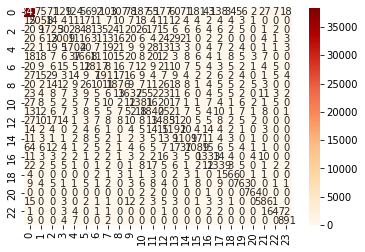

In [26]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred2))

cm = confusion_matrix(y_pred2, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- KNeighborsClassifier

In [27]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

MAE: 0.5292794591285368
MSE: 5.965516782453618
RMSE: 2.442440742874557


In [28]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred2, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred2,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred2,average='weighted'))

Precision Score :  0.9281640102607451
Recall Score :  0.9289973116132982
f1_score :  0.9280017676493468


# Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier()
RandomForestClassifier.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
y_pred3 = RandomForestClassifier.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred3)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred3)* 100}")

Accuracy is: 96.42391333280098


Classification report : 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     38828
           1       0.98      0.97      0.97      2247
           2       0.94      0.95      0.95      1964
           3       0.97      0.94      0.95      2266
           4       0.97      0.92      0.94      1973
           5       0.97      0.93      0.95      1941
           6       0.97      0.94      0.95      2045
           7       0.96      0.94      0.95      2179
           8       0.97      0.94      0.95      2155
           9       0.95      0.92      0.93      1927
          10       0.97      0.86      0.91      1749
          11       0.98      0.93      0.95      2132
          12       0.96      0.87      0.92      1925
          13       0.98      0.92      0.94      1471
          14       0.96      0.91      0.94      1342
          15       0.91      0.88      0.89      1338
          16       0.98      0.96      0.97      1480
 

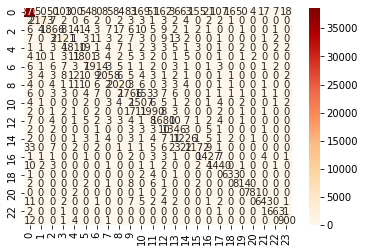

In [32]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred3))

cm = confusion_matrix(y_pred3, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Random Forest

In [33]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

MAE: 0.2980515850834465
MSE: 3.6256887327317737
RMSE: 1.9041241379520857


In [34]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred3, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred3,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred3,average='weighted'))

Precision Score :  0.96438901041057
Recall Score :  0.9642391333280098
f1_score :  0.9638548152419617


# XGBoost

In [35]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIn

[12:37:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [36]:
y_pred4 = xgb.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred4)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred4)* 100}")

Accuracy is: 91.42644201336209


Classification report : 
               precision    recall  f1-score   support

           0       0.94      0.99      0.96     38828
           1       0.92      0.90      0.91      2247
           2       0.81      0.84      0.82      1964
           3       0.89      0.84      0.87      2266
           4       0.89      0.84      0.86      1973
           5       0.89      0.80      0.84      1941
           6       0.89      0.85      0.87      2045
           7       0.88      0.87      0.87      2179
           8       0.86      0.84      0.85      2155
           9       0.83      0.80      0.81      1927
          10       0.86      0.76      0.81      1749
          11       0.88      0.81      0.84      2132
          12       0.81      0.66      0.73      1925
          13       0.89      0.76      0.82      1471
          14       0.88      0.82      0.85      1342
          15       0.84      0.83      0.83      1338
          16       0.87      0.87      0.87      1480
 

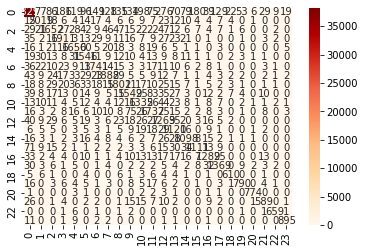

In [38]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred4))

cm = confusion_matrix(y_pred4, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- XGBoost

In [39]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred4))
print('MSE:', metrics.mean_squared_error(y_test, y_pred4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))

MAE: 0.6120737842370039
MSE: 6.7122095344565995
RMSE: 2.590793224951887


In [40]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred4, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred4,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred4,average='weighted'))

Precision Score :  0.912617383502579
Recall Score :  0.9142644201336209
f1_score :  0.9126107907076306


# ExtraTreesClassifier

In [41]:
from sklearn.ensemble import ExtraTreesClassifier
extratree = ExtraTreesClassifier()
extratree.fit(X_train, y_train)

ExtraTreesClassifier()

In [42]:
y_pred5 = extratree.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred5)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred5)* 100}")

Accuracy is: 96.63153131571242


Classification report : 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     38828
           1       0.99      0.97      0.98      2247
           2       0.95      0.95      0.95      1964
           3       0.98      0.94      0.96      2266
           4       0.97      0.93      0.95      1973
           5       0.98      0.93      0.96      1941
           6       0.98      0.94      0.96      2045
           7       0.98      0.95      0.96      2179
           8       0.97      0.94      0.95      2155
           9       0.97      0.93      0.95      1927
          10       0.98      0.86      0.91      1749
          11       0.98      0.95      0.96      2132
          12       0.97      0.87      0.92      1925
          13       0.98      0.93      0.95      1471
          14       0.98      0.92      0.95      1342
          15       0.92      0.86      0.89      1338
          16       0.99      0.96      0.98      1480
 

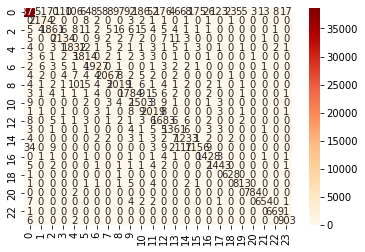

In [44]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred5))

cm = confusion_matrix(y_pred5, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- ExtraTreesClassifier

In [45]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred5))
print('MSE:', metrics.mean_squared_error(y_test, y_pred5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5)))

MAE: 0.2958156991136309
MSE: 3.620445047778754
RMSE: 1.90274671140926


In [46]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred5, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred5,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred5,average='weighted'))

Precision Score :  0.9667199910095803
Recall Score :  0.9663153131571243
f1_score :  0.9659655025019654
